In [2]:
import numpy as np
import pandas as pd
import random 
from scipy import stats
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate

# Sampling Methods
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

# Simple ML models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble Learning
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Performance metrics
import sklearn.metrics as skm


Credit Card Fraud Detection by using structured dataset which clearly pointed out the transaction amount and class (0 means no fraud and 1 means there are some frauds). In the below code, i will run some code for this kind of dataset. Also important to know that the dataset is highly imbalanced. This dataset presents transactions that occurred in two days, where it has 492 frauds out of 284,807 transactions. Hence, before applying any model and/or ML, data processing and data analysis are needed. 

In [3]:
df=pd.read_csv('C:\\Users\\Buhat\\OneDrive\\Desktop\\Minor\\Individual Project\\creditcard.csv')
df.head() # This dataset contains only the transaction details and the target variable is 'Class' which is 0 for normal transaction and 1 for fraud transaction

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
class_counts = df["Class"].value_counts()
print(class_counts) # The dataset is highly imbalanced as the number of normal transactions are way more than the number of fraud transactions

Class
0    284315
1       492
Name: count, dtype: int64


In [5]:
df.info() # The data type of all the columns is float64, which is good for the model creation.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
missing_values = df.isnull().sum() # the dataset contains no missing values.
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
df.describe() # The dataset contains 31 columns and the mean of all the columns is almost 0 and the standard deviation is almost 1, which is good for the model creation.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.804747e-12,-6.644481e-13,-5.733476e-13,7.602684e-13,2.290382e-13,6.119060e-14,3.241792e-14,-5.131360e-13,-7.735175e-13,...,-1.365215e-12,-7.572798e-13,-1.814482e-13,1.067890e-12,-6.013363e-13,-1.204946e-13,2.643612e-12,-3.222971e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
## Target Variable Analysis
df['Class'].value_counts(normalize=True) # Before proceeding, i should avoid any overfitting issues when fitting the machine learning models.

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

The dataset did not have any information on the numerical predictors for privacy, given their transformation and standardization, excluding Amount & Time. In that regard, Amount presented itself as potentially most informative for the feature variable analysis. To better understand the variable's distribution, I had to transform it using a log scale.

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


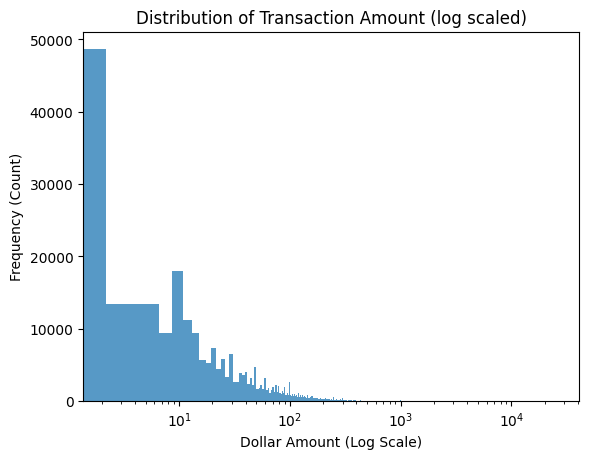

In [9]:
## Feature Variable Analysis

# Basic statistics
print(df['Amount'].describe())

# Distribution
sns.histplot(data=df, x='Amount').set(xscale="log")
plt.xlabel("Dollar Amount (Log Scale)")
plt.ylabel("Frequency (Count)")
plt.title("Distribution of Transaction Amount (log scaled)")
plt.show()

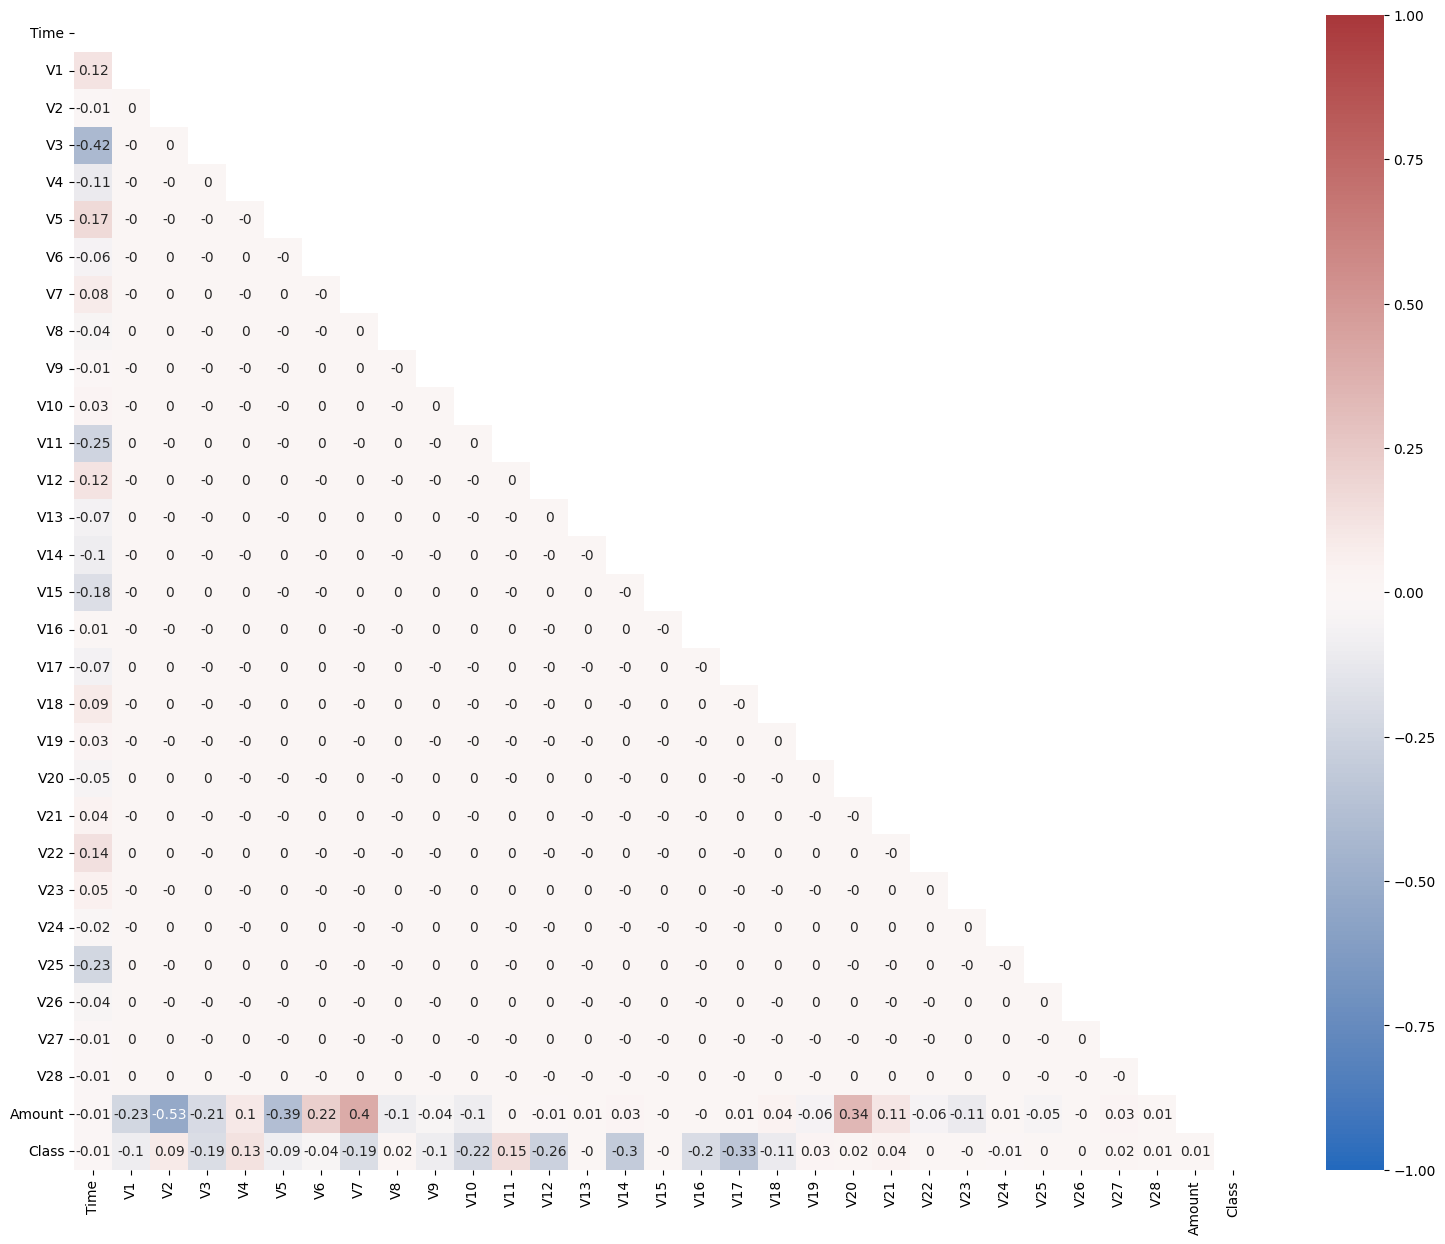

In [10]:
# Correlation Matrix
f = plt.figure(figsize=(19, 15))
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, 
            center=0, cmap='vlag', mask=mask)
plt.show()

Key Observations from the Heatmap:

Amount vs Other Features: Amount has notable correlations with V1 (0.23), V2 (0.53), V3 (0.21), and several other features. These values suggest some linear relationships that may be important for modeling.

Class vs Features -> The Class feature, representing whether a transaction is fraudulent, has notable correlations with several features:
- V10 (0.26)
- V14 (0.30)
- V17 (0.33)

These positive correlations suggest that higher values of these features are associated with fraudulent transactions. Conversely, some features like V12 (-0.14) and V4 (-0.11) show negative correlations with Class, suggesting that lower values of these features are associated with fraudulent transactions.

High Correlation Between Features: Features such as V1 and V2 (0.53) have a relatively high positive correlation with each other. V2 and V4 (-0.42) have a relatively high negative correlation.

High correlation between features can indicate multicollinearity, which might affect some machine learning models.

In [11]:
# Filtering those with some signigicant correlation coefficients
matrix = df.corr()
matrix = abs(matrix).unstack()
matrix = matrix[matrix.between(0.5, 1, inclusive='neither')]

print(matrix)

V2      Amount    0.531409
Amount  V2        0.531409
dtype: float64


Above appears that the V2 variable has a notable correlation to the Transaction Amount variable. Since most of them have been anonymized, we cannot make any further conclusion or analysis.

# Data Processing

In [12]:
## Simple processing steps
def basic_processing(data, col_drop, col_rename):
    """ Basic data processing: drop/rename columns, remove duplicate(s)
    
    Parameters
    ----------
    data : dataframe
        A dataset
    col_drop : list
        A list of column names to drop
    col_rename : dict
        A dictionary pairing the old and new column names desired

    Returns
    -------
    data
        a modified dataframe #The function drops specified columns, renames specified columns, and removes duplicate rows.
    """ 
    #Drop the 'Serial No.' column
    if len(col_drop) > 0:
        data.drop(col_drop, axis=1, inplace=True)

    # Renaming the target variable and one predictor
    if col_rename:
        data.rename(columns=col_rename, inplace=True)
    
    # Removing any Duplicate Observations if any
    data.drop_duplicates(keep='first', inplace=True)
    return data

In [13]:
df = basic_processing(df, col_drop = [], col_rename = {"Class": "target"})
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
def imputation_missing_val(data):
    """ Impute missing value using median and mode
    
    Parameters
    ----------
    data : dataframe
        A dataset

    Returns
    -------
    data
        an imputed dataframe
    """ 
    
    # Filter the columns with missing values
    null_cols = data.columns[data.isna().any()].tolist()
    
    for col in null_cols:
        # Impute using median for numeric columns
        if data[col].dtype.kind in 'iufc':
            data[col] = data[col].transform(lambda x: x.fillna(x.median()))
            
        # Impute using median for non-numeric columns
        else:
            data[col] = data[col].transform(lambda x: x.fillna(x.mode()))
    
    return data

In [15]:
def identify_missing_val(data):
    """ Identify missing/na values and handle them if present
    
    Parameters
    ----------
    data : dataframe
        A dataset

    Returns
    -------
    data
        a dataframe with no missing values 
        either after imputation or in its original format
    """
    # Count number of missing values 
    sum_nulls = data.isna().sum().sum()
    print("With %d null/na values in the dataset:" % sum_nulls)
    
    # Only visualize and handle missing values if present
    if sum_nulls > 0: 
        print("- We need to resolve this issue.")
        plt.figure(figsize=(10,6))
        sns.heatmap(data.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
        plt.xlabel("Features")
        plt.ylabel("Observations")
        plt.show()
        
        # Proceeding with imputing the dataset with missing values
        data = imputation_missing_val(data)
        sum_nulls = data.isna().sum().sum()
        print("After imputation, we have missing {:d} values in our data." % sum_nulls)
    else:
        print("- No action needed")
        
    return data

def imputation_missing_val(data):
    """ Simple imputation function for demonstration
    Here we fill missing values with the mean of the column.
    """
    return data.fillna(data.mean())


# Identify and handle missing values
df = identify_missing_val(df)

# Proceed with other processing steps if necessary

With 0 null/na values in the dataset:
- No action needed


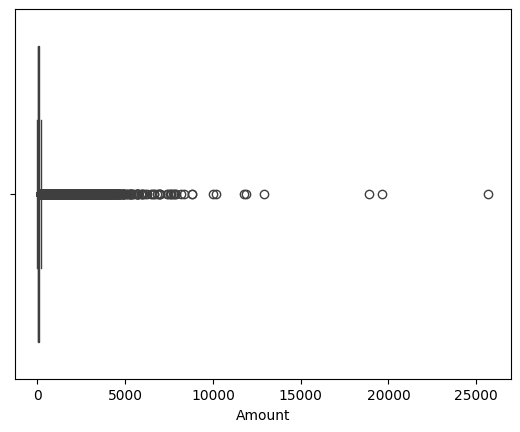

In [16]:
## Outliers
sns.boxplot(data=df, x='Amount')
plt.show()

In [17]:
# Detecting outliers using z-score
def outliers_detection(data, threshold=3):
    """ Function to detect outliers
    
    Parameters
    ----------
    data : dataframe
        A dataset
    threshold:
        The threshold at which a value is an outlier
        ±2.5σ from the µ

    Returns
    -------
    data
        a dataframe with no missing values 
        either after imputation or original format
    """
    print("At ±", threshold, "standard deviation from the mean:")
    for col in data.columns[:-1]:
        # Calculating the z-score for each predictor
        var = data[col]
        z = np.abs(stats.zscore(var))
# Outlier
        pos = list(np.where(z > threshold)[0])
        no_of_outliers = len(pos)
        if no_of_outliers > 0:
            print("\t- ", col, "variable contains", no_of_outliers,  "outliers")
            if no_of_outliers < 10:
                outliers = list(var[pos])
                print(outliers)
            else:
                continue

        else:
            print("\t- No outliers detected for the", col, "variable")

In [18]:
outliers_detection(df)

At ± 3 standard deviation from the mean:
	- No outliers detected for the Time variable
	-  V1 variable contains 3647 outliers
	-  V2 variable contains 4303 outliers
	-  V3 variable contains 1953 outliers
	-  V4 variable contains 3101 outliers
	-  V5 variable contains 2913 outliers
	-  V6 variable contains 4638 outliers
	-  V7 variable contains 3404 outliers
	-  V8 variable contains 4205 outliers
	-  V9 variable contains 2253 outliers
	-  V10 variable contains 3450 outliers
	-  V11 variable contains 661 outliers
	-  V12 variable contains 3446 outliers
	-  V13 variable contains 1189 outliers
	-  V14 variable contains 3378 outliers
	-  V15 variable contains 1252 outliers
	-  V16 variable contains 2085 outliers
	-  V17 variable contains 2520 outliers
	-  V18 variable contains 1669 outliers
	-  V19 variable contains 3395 outliers
	-  V20 variable contains 4594 outliers
	-  V21 variable contains 4096 outliers
	-  V22 variable contains 1212 outliers
	-  V23 variable contains 3356 outliers
	- 

I decided to keep them all since good data science practices advocates to conserve as many data points as possible. Thus, allowing me to limit the biases simply to produce a better fitting model or statistically significant results.

## Data Analysis

How does Amount's distribution behaves across the Fraud Class?

In an attempt to answer the first question, it is required to first split the dataset by target types; in other words, fraudulent and non-fraudulent transactions. Then plot the histogram side by side to observe any unusual behavior. In doing so, the non-fraud transactions were heavily right-skewed, making it quite challenging to compare the plots. To solve this issue, logarithmic transformation is needed, which making it easier to see and thus, evaluate any similarities and differences.

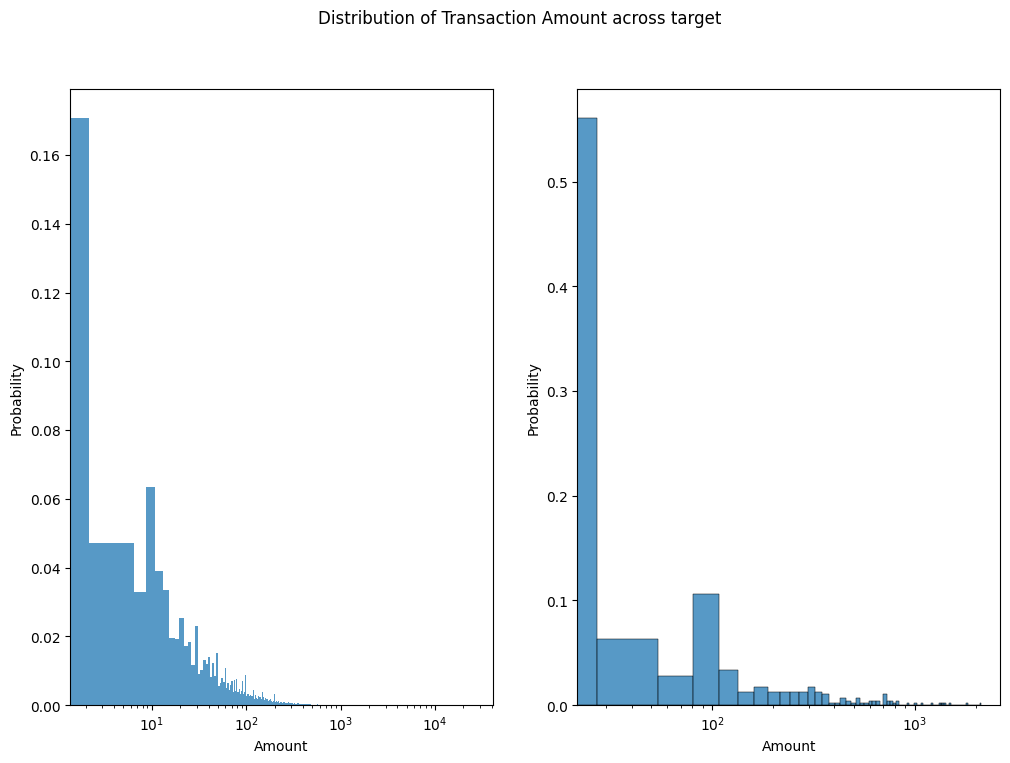

In [19]:
# Splitting data by fraud target
df_no_fraud = df[df['target'] == 0]
df_fraud = df[df['target'] == 1]

# Histogram for Amount Distribution per target
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Distribution of Transaction Amount across target')
sns.histplot(ax=ax1, data=df_no_fraud, x='Amount', stat='probability').set(xscale="log")
sns.histplot(ax=ax2, data=df_fraud, x='Amount', stat='probability').set(xscale="log")
plt.show()

Both distributions above represent a similar trajectory, with most transactions on the lower end of the graph. It stays consistent with the mean value found at USD88, even with max values averaging USD20,000.

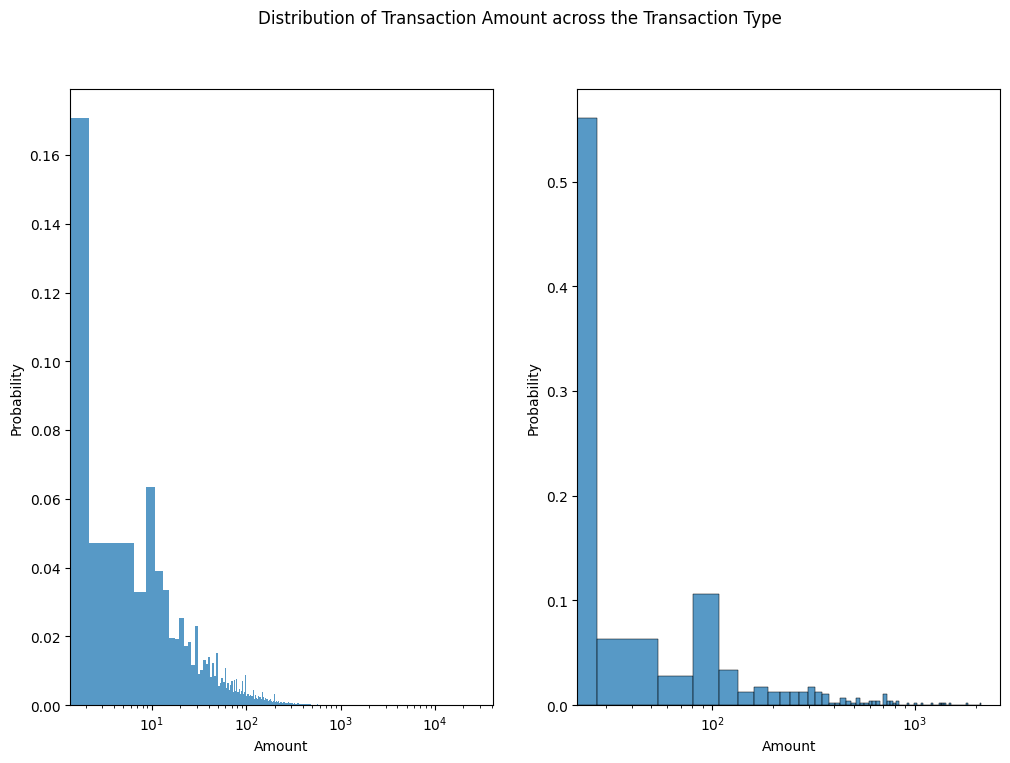

In [20]:
# Histogram for Amount Distribution per target after log transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Distribution of Transaction Amount across the Transaction Type')
sns.histplot(ax=ax1, data=df_no_fraud, x='Amount', stat='probability').set(xscale="log")
sns.histplot(ax=ax2, data=df_fraud, x='Amount', stat='probability').set(xscale="log")
plt.show()

### Is there anytime where the fraud was occured?

In this case, I need to check the timing of transaction to detect something unusual. So I will only use the fraud dataset for this. 

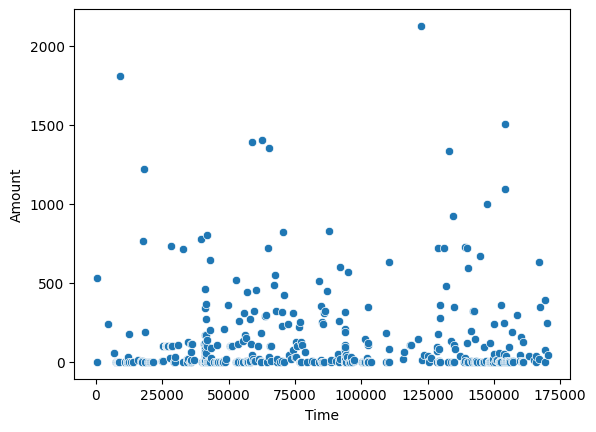

In [21]:
# Scatterplot
sns.scatterplot(data=df_fraud, x='Time', y='Amount')
plt.show()

The above plot does not show any clustering, which means that the fraud appear quite randomly. 

## Class Imbalance

The diagnostics observed a stark imbalance between targetes of transactions, with fraud only making up 0.2% of all transaction. Given the limited pool of examples to train, it poses an issue in terms of building an effective machine model to predict if there is a fraud. With the minority target being so small, poor performance would be expected on the critical task of detecting fraud transactions. In that vein, different sampling methods (Undersampling & Oversampling) will be used to tackle this problem.

Definitions:

- SMOTE (Synthetic Minority Oversampling Technique) is an oversampling approach to the minority target. In context, it would mean to randomly increase fraud examples by "artificially" replicating to have a more balanced target distribution. Further information here.
- Near-Miss Algorithm is an undersampling approach on the majority target. In context, select examples to keep out of the training set based on the distance of majority target examples to minority target examples. Further information here.
- Combine over- and uner- sampling: With the risk of overfitting with oversampling and the possibility to lose valuable information from undersampling, also consider combining both to rebalance the distribution. So, it shall proceed with the combination to offer curve out the risks it defined. 

In [22]:
def class_imbalance(data, sampling_methods={'SMOTE': SMOTE(), 'Near-Miss': NearMiss(),
                                            'over': RandomOverSampler(sampling_strategy=0.5),
                                            'under':RandomUnderSampler(sampling_strategy=0.8)}):
    """ Mitigate the risk of poor model performance using re-sampling methods
    
    Parameters
    ----------
    data: dataframe
        A dataset
    
    sampling_methods: dictionary
        Key-pair values of under- and over- sampling methods
        
    Returns
    -------
    X_sampled, y_sampled: arrays of values
        Feature(s) and Target variable respectively with sampling methods done
    """
    # Splitting features & target variable
    X = df.drop(columns=['target'], axis=1)
    y = df['target']
#Testing SMOTE() and Near-Miss() Algorithms
    sampling_alg = [sampling_methods['SMOTE'], sampling_methods['Near-Miss']]

    for alg in sampling_alg:
        X_new, y_new = alg.fit_resample(X, y)
        bal = y_new.value_counts(normalize=True) * 100
        
        print(f'''Shape of X before {alg}: {X.shape} Shape of X after {alg}: {X_new.shape}''')
        print(f'\nBalance of positive and negative classes (%): \n{bal}\n')
    
    ## Combined Sampling: Random Sampling Algorithms
    X_over, y_over = sampling_methods['over'].fit_resample(X, y)
    X_sampled, y_sampled = sampling_methods['under'].fit_resample(X_over, y_over)
    
    bal = y_sampled.value_counts(normalize=True) * 100
    print(f'''After combined sampling, shape of features: {X_sampled.shape}''')
    print(f'\nBalance of positive and negative classes (%): \n{bal}\n')
        
    return X_sampled, y_sampled

In [23]:
X, y = class_imbalance(df)

c:\Users\Buhat\anaconda3\envs\DataScience\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Buhat\anaconda3\envs\DataScience\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Shape of X before SMOTE(): (283726, 30) Shape of X after SMOTE(): (566506, 30)

Balance of positive and negative classes (%): 
target
0    50.0
1    50.0
Name: proportion, dtype: float64

Shape of X before NearMiss(): (283726, 30) Shape of X after NearMiss(): (946, 30)

Balance of positive and negative classes (%): 
target
0    50.0
1    50.0
Name: proportion, dtype: float64

After combined sampling, shape of features: (318658, 30)

Balance of positive and negative classes (%): 
target
0    55.555486
1    44.444514
Name: proportion, dtype: float64



## Dimensionality Reduction
This section will use dimensionality reduction to trim down the number of features that the data has. Dimensionality reduction encapsulates the techniques reducing the input variables in the training data. In doing so, it is aimed to have a more straightforward but effective machine learning model structure and avoid any potential case of overfitting. Three different testing methods from Linear Algebra will be used: PCA, SVD, and LDA and pick the one capturing the most variability in the datasets after reducing it to principal components.

- PCA (Principal Component Analysis) takes data with m-columns projected to a subspace with n-features (n < m) while preserving the crucial information from the original data; in other words, PCA attempts to find the principal components (or features) as its names denote.
- SVD (Singular Value Decomposition) is a process breaking down a matrix into its constituents elements by factorizing it into three separate matrices: M=UΣVᵗ.
M: original matrix
U: left singular matrix (columns are left singular vectors) containing eigenvectors of matrix MMᵗ
Σ: a diagonal matrix containing singular (eigen)values
V: right singular matrix (columns are right singular vectors) containing eigenvectors of matrix MᵗM.
- Factor Analysis is a technique that is used to reduce a large number of variables into fewer numbers of factors. This technique extracts maximum common variance from all variables and puts them into a common score.

In [24]:
def dimensionality_reduction(X, n=5,
                             dimred_methods={'PCA':PCA(),'SVD':TruncatedSVD()}):
    """ Deal with the multiple anonymized variables using dimensionality reduction
   Parameters
    ----------
    X: Array
        Feature(s)
        
    n: Discrete number
        Reduce the total number of features into n components
        
    dimred_methods: dictionary
        Key-pair values of dimensionality reduction methods
        
    Returns
    -------
    X, y
        Final Feature(s) and Target variables after dimensionality reduction
    """
    
    name, result = '', 0
    for method_name, method_func in dimred_methods.items():
        method_func.n_components = n
        method_func.fit_transform(X)
        exp_var = np.sum(method_func.explained_variance_ratio_)
        if exp_var > result:
            name = method_name 
            result = exp_var
        else:
            continue
    final = dimred_methods[name]
    final.n_components = n
    
    return final.fit_transform(X)

In [25]:
X_red = dimensionality_reduction(X)

## ML Set Up
### Logistic regression
### KNN


In [53]:
def model_comparison(X, y, models):
    """ Function to split data into training and testing set
    
    Parameters
    ----------
data : dataframe
        A dataset
    models: A dictionary
        A pre-defined dictionary with each model name and applicable function
    
    optional train_test params
    
    Returns
    -------
    models_df
        A dataframe with each model performance
    """
    # Obtain training and testing sets from function above
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # Craete dictionary to save performance data 
    models_perf = {'Models': [], 'CV_mean': [], 'CV_std': []}
    
    # Obtain model performance across K-Fold using Cross-Validation 
    for model in models:
        cv_results = cross_validate(model, X_train, y_train, 
                                    cv=3, scoring='average_precision')
        n_scores = abs(cv_results['test_score'])
        models_perf['Models'].append(str(model))
        models_perf['CV_mean'].append(np.mean(n_scores))
        models_perf['CV_std'].append(np.std(n_scores))
    
    models_df = pd.DataFrame(models_perf, columns = ['Models', 'CV_mean', 'CV_std'])
    return models_df

### Logistic Regression VS KNN

In [27]:
# List of simple ML models
models_simple = [LogisticRegression(max_iter=1000), KNeighborsClassifier()
                 ]

# Model Comparison
model_comparison(X_red, y, models_simple)

,Models,CV_mean,CV_std
0,LogisticRegression(max_iter=1000),0.983661,0.000330
1,KNeighborsClassifier(),0.997361,0.000231


### Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [71]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [72]:
X = df.drop(columns=["target"])
y = df["target"]

#Create X and y to put into the model

mean_target = np.mean(df['target'])
print('Mean target:', mean_target)

#Checking the Mean of the diagnosis to see how much of an improvement the model is over just guessing

Mean target: 0.001667101358352777


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)

#Training the data by splitting it into a part thats used for training and a part that is used for testing. Then applying the GaussianNB model

GaussianNB()

In [74]:
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

#Running the model

Accuracy: 0.9928629330701724


In [75]:
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

#Checking how accurate the model is at predicting the diagnosis

Test accuracy: 0.9928629330701724


Confusion matrix
[[56291   365]
 [   40    50]]


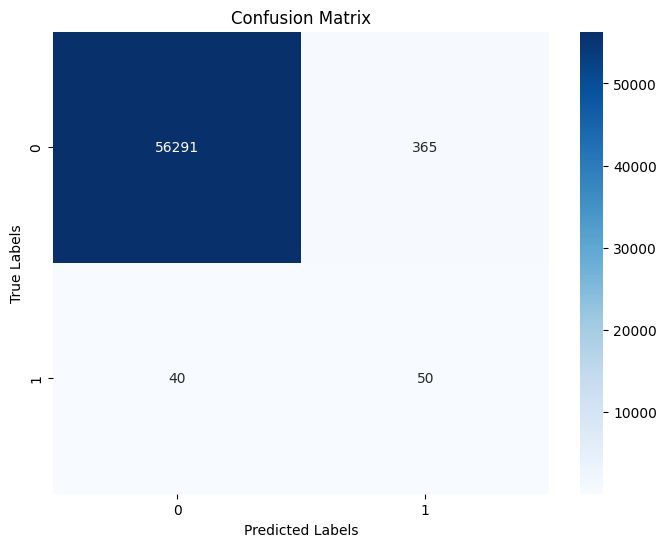

In [77]:
# Compute the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print('Confusion matrix')
print(matrix)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [76]:
x=(56291+50)/(56291+365+50+40)
print(x)
# The percentage of the model accuracy.

0.9928629330701724


## Final Conclusion:
According to the test above for this specific dataset, KNN has the accuracy percentage of 0.997, Logistic Regression has 0.98, and Naive Bayes has 0.993. Therefore, my recommendation for this type of dataset is to use KNN to predict fraud. Important to note that to be able to use the KNN, we need to check if the dataset is balanced or not. If not, then the data processing and data analysis part are needed to have a better result. 

## Second try on different types of dataset

In [36]:
import arff  # This is from the liac-arff library

# Load the ARFF file
file_path = 'C:\\Users\\Buhat\\OneDrive\\Desktop\\Minor\\Individual Project\\dataset_ (2)'
with open(file_path, 'r') as f:
    data = arff.load(f)

# Convert to pandas DataFrame
df_1 = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])

# Print the head of the dataset
df_1.head() # This dataset is to train embedding model. 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [37]:
df_1.describe() # The dataset contains 31 columns and the mean of all the columns is almost 0 and the standard deviation is almost 1, which is good for the model creation.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [38]:
# Define features by dropping the 'CUST_ID' column
features = df_1.drop(['CUST_ID'], axis=1)

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(features)

# Convert the imputed features back to a DataFrame
imputed_df_1 = pd.DataFrame(imputed_features, columns=features.columns)

# Display the first few rows of the DataFrame
print(imputed_df_1.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [39]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_df_1)

# Convert the scaled features back to a DataFrame
scaled_df_1 = pd.DataFrame(scaled_features, columns=features.columns)

# Print the first few rows to verify
scaled_df_1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-0.310968,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,0.089310,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-0.101663,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,0.000000,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-0.265791,-0.525551,0.36068


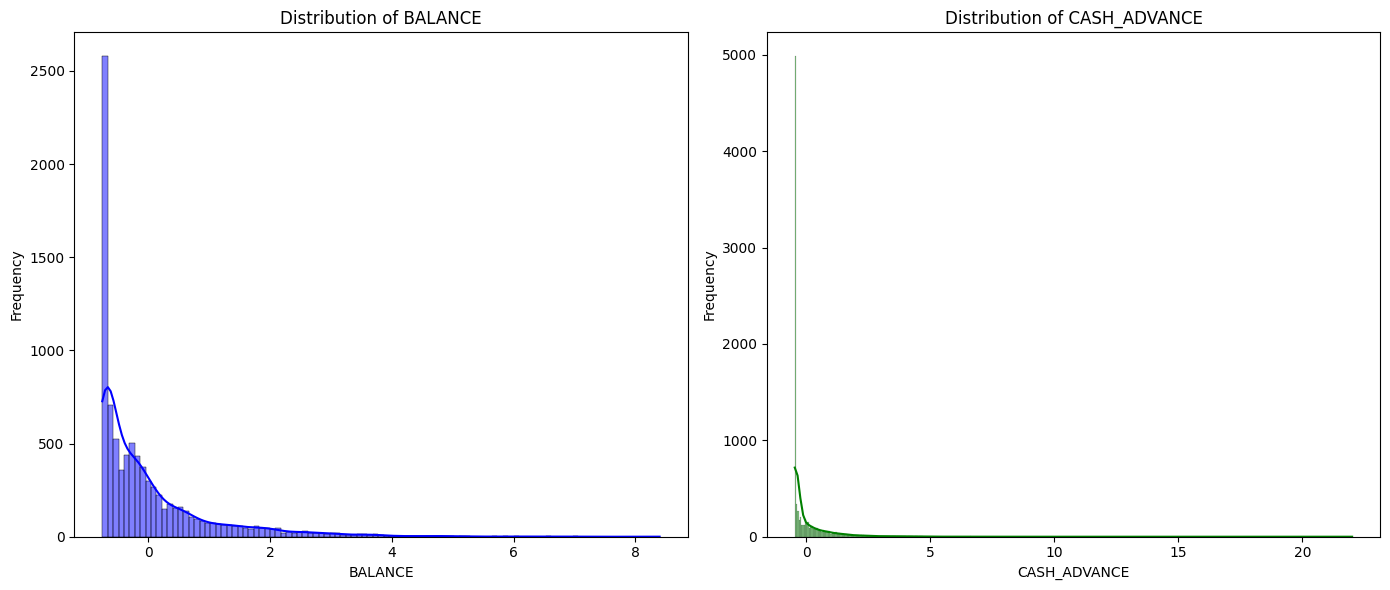

In [40]:
# Set up the figure and axes for the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribution plot for BALANCE
sns.histplot(scaled_df_1['BALANCE'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of BALANCE')
axes[0].set_xlabel('BALANCE')
axes[0].set_ylabel('Frequency')

# Distribution plot for CASH_ADVANCE
sns.histplot(scaled_df_1['CASH_ADVANCE'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of CASH_ADVANCE')
axes[1].set_xlabel('CASH_ADVANCE')
axes[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [41]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(scaled_df_1)

print(f"Original number of features: {scaled_df_1.shape[1]}")
print(f"Reduced number of features: {X_pca.shape[1]}")


Original number of features: 17
Reduced number of features: 12


variance Retention: By reducing the dataset from 17 to 12 dimensions, I have effectively compressed the data without losing significant information. This makes the dataset more manageable and can potentially improve the performance of machine learning models by eliminating noise and redundant features.

Dimensionality Reduction: Reducing the number of features from 17 to 12 simplifies the model and can help in faster computation, easier visualization, and potentially better model performance due to the reduced risk of overfitting.

In [42]:
from sklearn.ensemble import IsolationForest # This model is used to detect anomalies in the dataset, and is particularly sued for outlier detection.

# Initialize the model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model and predict anomalies
iso_forest.fit(X_pca)
anomalies = iso_forest.predict(X_pca)

# Add the anomaly prediction to the DataFrame (-1 for anomalies, 1 for normal)
scaled_df_1['anomaly'] = anomalies

# Print anomaly counts
print(scaled_df_1['anomaly'].value_counts()) # The dataset contains 8860 normal transactions and 90 fraud transactions.
scaled_df_1.head() #this dataset is used to train the embedding model.

anomaly
 1    8860
-1      90
Name: count, dtype: int64


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,anomaly
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-0.310968,-0.525551,0.36068,1
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,0.089310,0.234227,0.36068,1
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-0.101663,-0.525551,0.36068,1
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,0.000000,-0.525551,0.36068,1
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-0.265791,-0.525551,0.36068,1


In [43]:
# Fit the model and predict anomalies
iso_forest.fit(X_pca)
anomalies = iso_forest.predict(X_pca)

# Add the anomaly prediction to the DataFrame (-1 for anomalies, 1 for normal)
scaled_df_1['fraud_label'] = anomalies

# Map -1 to 1 (fraud) and 1 to 0 (non-fraud)
df_1['fraud_label'] = scaled_df_1['fraud_label'].map({-1: 1, 1: 0})

# Print the count of each label
print(df_1['fraud_label'].value_counts())

df_1.head() # The dataset now contains a new column 'fraud_label' which is 0 for normal transactions and 1 for fraud transactions. This will help me with supervised learning.

fraud_label
0    8860
1      90
Name: count, dtype: int64


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,fraud_label
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [44]:
# Separate features and labels
X = scaled_df_1.drop(['fraud_label'], axis=1)
y = df_1['fraud_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Embedding,Flatten
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_feature_encoded = encoder.fit_transform(df_1['CUST_ID']) # The Embedding Model helps me to convert the categorical feature into a numerical feature, and then I can use it to train the neural network model.

# Define the number of unique values in the categorical feature
vocab_size = len(encoder.classes_)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\Buhat\anaconda3\envs\DataScience\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8695 - loss: 0.3841 - val_accuracy: 0.9867 - val_loss: 0.0810
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9907 - loss: 0.0786 - val_accuracy: 0.9902 - val_loss: 0.0259
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9925 - loss: 0.0450 - val_accuracy: 0.9965 - val_loss: 0.0133
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9945 - loss: 0.0241 - val_accuracy: 0.9972 - val_loss: 0.0085
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9957 - loss: 0.0176 - val_accuracy: 0.9979 - val_loss: 0.0064
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9967 - loss: 0.0114 - val_accuracy: 0.9986 - val_loss: 0.0059
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9974 - loss: 0.0087 - val_accuracy: 0.9986 - val_loss: 0.0040
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9984 - loss: 0.0059 - val_accuracy: 0.

In [47]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

56/56 - 0s - 2ms/step - accuracy: 0.9994 - loss: 7.2264e-04
Test Loss: 0.0007226443267427385
Test Accuracy: 0.9994413256645203


In [48]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy}')

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9998 - loss: 3.0099e-04
Test Accuracy: 0.9994413256645203


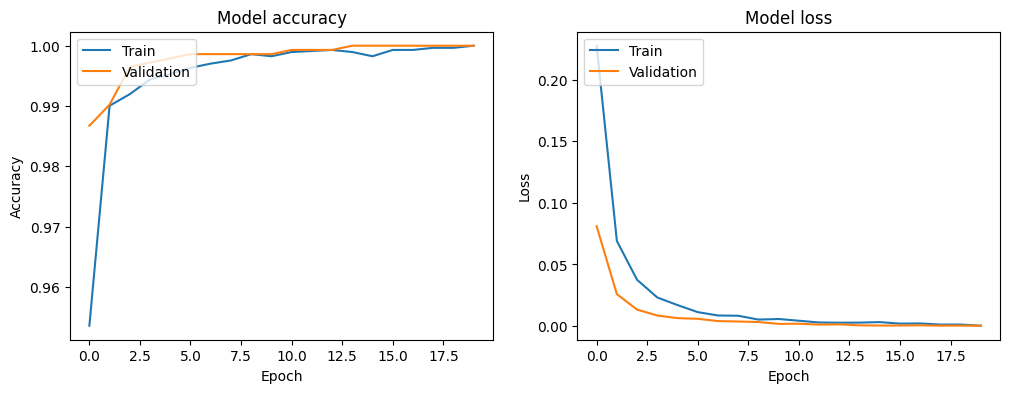

In [49]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Training and Validation Curves

Model Accuracy Plot: 
- Training Accuracy (Blue Line): Starts at approximately 92% and improves rapidly, reaching nearly 100% within a few epochs.
- Validation Accuracy (Orange Line): Follows a similar trend, starting at a high value and reaching 100% around the same time as the training accuracy.
Model Loss Plot

- Training Loss (Blue Line): Starts higher and decreases rapidly within the first few epochs, stabilizing at a very low value.
- Validation Loss (Orange Line): Starts lower than the training loss and decreases even more rapidly, stabilizing close to zero.

We can see that, the effectiveness of PCA in simplifying the feature space has provided a high accuracy in model training. However, I still consider there might be overfitting issue, hence, I am going to use the cross-validation to test it my question. 

In [50]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Input

# Function to create the Keras model
def create_model():
    model = Sequential()
    model.add(Input(shape=(X_pca.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Lists to store the results
accuracy_scores = []

for train_index, test_index in skf.split(X_pca, y):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Create and train the model
    model = create_model()
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
    
    # Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the cross-validation results
print(f'Cross-validation scores: {accuracy_scores}')
print(f'Average cross-validation score: {sum(accuracy_scores) / len(accuracy_scores)}')

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Cross-validation scores: [0.993854748603352, 0.9966480446927374, 0.9960893854748604, 0.9955307262569832, 0.9983240223463687]
Average cross-validation score: 0.9960893854748603


### Explanation form the cross-validation scores above:

- Cross-Validation Scores: These values represent the accuracy of the model on each of the 5 folds of the dataset.
The scores are very high, ranging from approximately 99.32% to 99.83%, indicating that the model performs consistently well across different subsets of the data.

- Average Cross-Validation Score: The average score is approximately 99.57%, which suggests that the model generalizes very well to unseen data.

### Detailed breakdown of each step:

- 56/56: This indicates the number of steps (batches) in the evaluation process for each fold.
- 0s 1ms/step, 0s 2ms/step: This indicates the time taken for each step. Here, it took approximately 2 millisecond per step, and the total time was less than a second.

### Interpretation:

- Consistent High Performance: The model shows consistently high accuracy across all folds. This consistency suggests that the model is not overfitting to any particular subset of the data and is able to generalize well.

- Efficiency: The time taken per step is very low, indicating that the model evaluation process is efficient.

### Final Evaluation code to try with the real-time data:

- Split the data into training and testing sets:

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

- Create and train the model on the full training set:

model = create_model(), 
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

- Evaluate the model on the test set:

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy}'), 
print(f'Test Loss: {test_loss}')
